## TREM2 sub-analysis - Calgary cohort

### Prerequisites

In [1]:
dyn.load('/grid/wsbs/home_norepl/skleeman/miniconda3/lib/libgeos_c.so.1')
library(Seurat)
library(dplyr)
library(Nebulosa)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: patchwork



### Load scRNA-seq data

Only CD14+ monocytes, re-clustered and re-batch corrected by Sarthak

In [3]:
# Download our Seurat obj from FigShare: https://figshare.com/ndownloader/files/31562957
load('~/covid.combined_final.CD14.Mono.Robj', verbose=TRUE)

Loading objects:
  covid.combined_final.CD14.Mono


### Visualize clusters

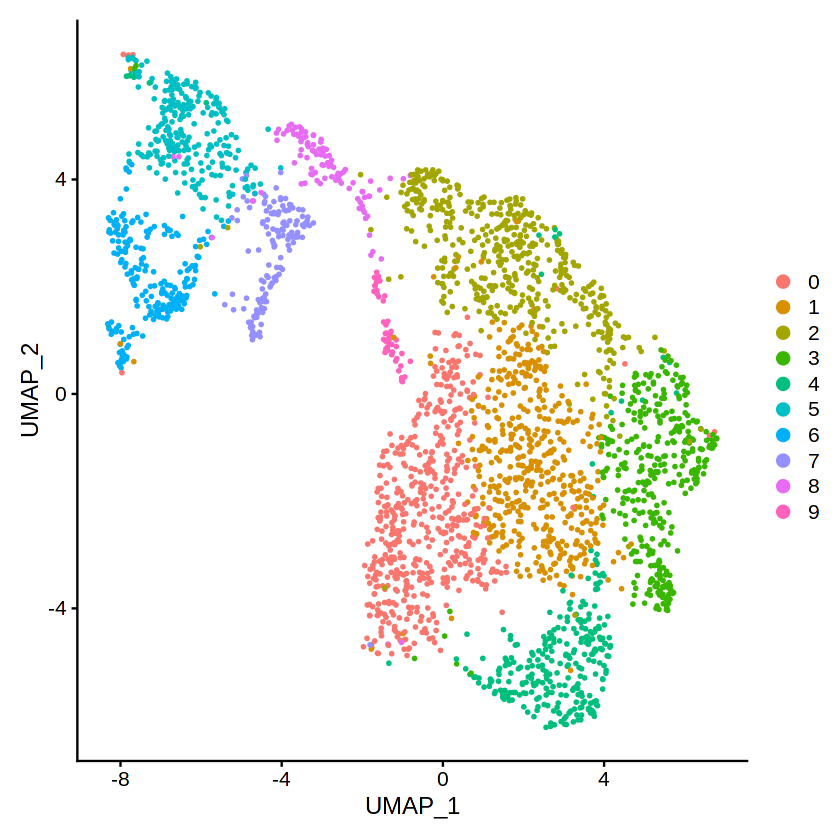

In [4]:
DimPlot(covid.combined_final.CD14.Mono, reduction = "umap")

### Identify putative TREM2+ cluster

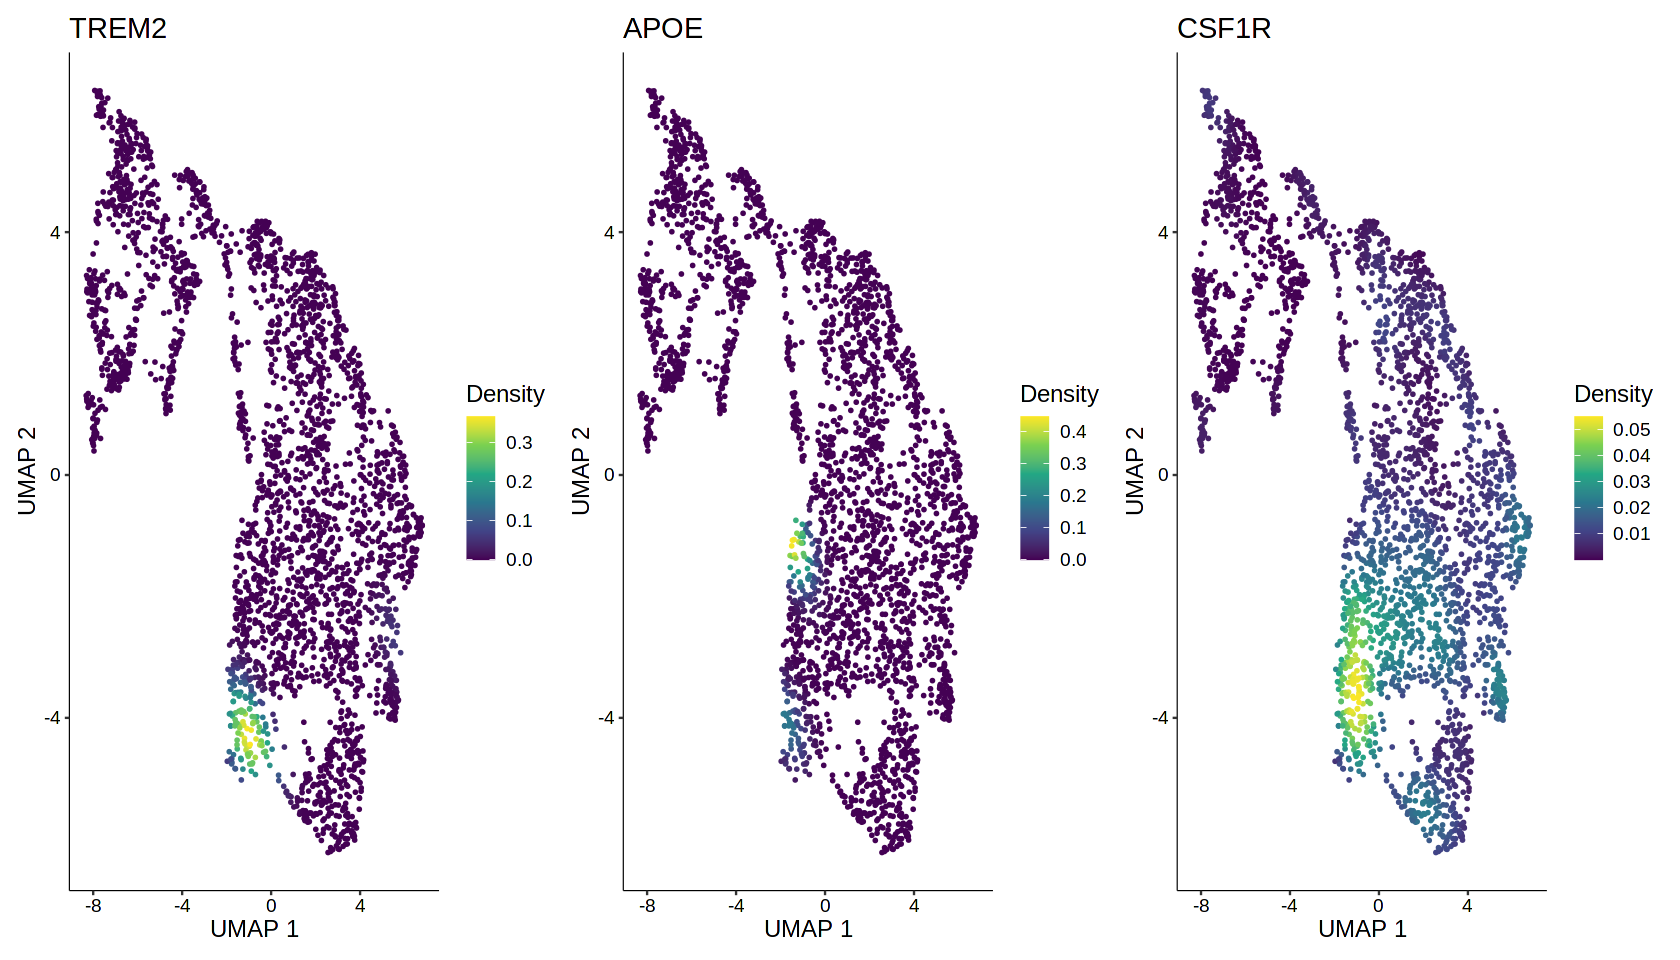

In [6]:
options(repr.plot.width=14, repr.plot.height=8)

a=plot_density(covid.combined_final.CD14.Mono, "TREM2",reduction = "umap")
b=plot_density(covid.combined_final.CD14.Mono, "APOE",reduction = "umap")
c=plot_density(covid.combined_final.CD14.Mono, "CSF1R",reduction = "umap")
library(patchwork)
a+b+c

### Pathway analysis for TREM2 signature

Cluster 0 appears to be enriched in TREM2 signature-expressing cells.

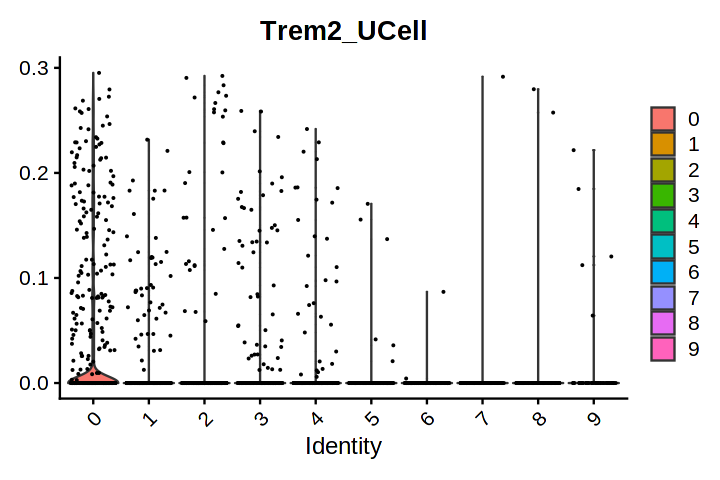

In [9]:
options(repr.plot.width=6, repr.plot.height=4)

library(UCell)
markers <- list()
markers$Trem2 <- c("TREM2", "CSF1R","APOE")

covid.combined_final.CD14.Mono <- AddModuleScore_UCell(covid.combined_final.CD14.Mono, features = markers)
signature.names <- paste0(names(markers), "_UCell")

VlnPlot(covid.combined_final.CD14.Mono, features = signature.names, group.by = "seurat_clusters")

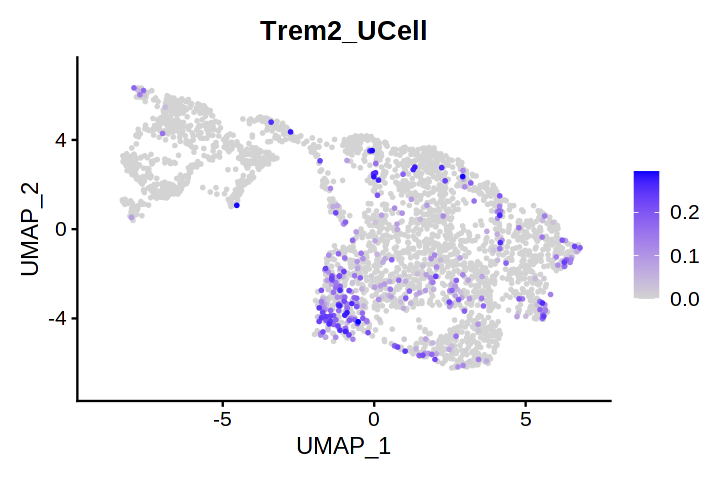

In [10]:
options(repr.plot.width=6, repr.plot.height=4)

FeaturePlot(covid.combined_final.CD14.Mono, reduction = "umap", features = signature.names, 
    order = T)

### Differential proportion analysis

#### 72 hours (dex vs. no dex)

In [11]:
library(speckle)

res=subset(x = covid.combined_final.CD14.Mono, subset = time == "72h")

propeller(
  x = res,
  clusters = res@meta.data$seurat_cluster,
  sample = res@meta.data$patientID,
  group = res@meta.data$status,
  transform = "logit"
)






Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



,BaselineProp.clusters,BaselineProp.Freq,PropMean.dex,PropMean.nodex,PropRatio,Tstatistic,P.Value,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4,0.12930628,0.000000000,0.112367712,0.0000000,-1.84711118,0.07756825,0.3720491
5,5,0.10948561,0.035555556,0.088661530,0.4010257,-1.68237433,0.10595439,0.3720491
6,6,0.07361963,0.030958395,0.137218845,0.2256133,-1.65413229,0.11161473,0.3720491
3,3,0.15479000,0.373943939,0.163564423,2.2862181,1.47442892,0.15533850,0.3883463
8,8,0.04860783,0.070833333,0.004667744,15.1750685,0.85730240,0.40007700,0.6749036
7,7,0.06559698,0.089267116,0.016883327,5.2872941,0.78309900,0.44151690,0.6749036
0,0,0.12505899,0.029238936,0.107658942,0.2715885,-0.65490331,0.51899283,0.6749036
9,9,0.01557338,0.007302738,0.012781050,0.5713723,-0.62216197,0.53992291,0.6749036
2,2,0.15243039,0.240529686,0.154378751,1.5580492,0.17030039,0.86625532,0.9298036


#### 7 days (dex vs. no dex)

In [17]:
library(speckle)

res=subset(x = covid.combined_final.CD14.Mono, subset = time == "7day")

propeller(
  x = res,
  clusters = res@meta.data$seurat_cluster,
  sample = res@meta.data$patientID,
  group = res@meta.data$status,
  transform = "logit"
)


Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



,BaselineProp.clusters,BaselineProp.Freq,PropMean.dex,PropMean.nodex,PropRatio,Tstatistic,P.Value,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.28072445,0.113506603,0.378763422,0.29967678,-2.1330913,0.0525848,0.5258480
0,0,0.34282018,0.471115891,0.227906206,2.06714814,1.6370918,0.1287260,0.6436298
5,5,0.02069858,0.065576602,0.023126058,2.83561528,1.3573742,0.1977961,0.6593204
8,8,0.00000000,0.000000000,0.000000000,NaN,0.9560331,0.3565241,0.6930784
7,7,0.01034929,0.008948546,0.008435192,1.06085855,0.8795878,0.3950762,0.6930784
2,2,0.18628719,0.248399886,0.132096001,1.88044970,0.8369255,0.4177779,0.6930784
3,3,0.03492885,0.004504505,0.070173430,0.06419103,-0.7213184,0.4851549,0.6930784
4,4,0.02199224,0.000000000,0.044011083,0.00000000,-0.5285540,0.6071889,0.7589861
9,9,0.02069858,0.013422819,0.015713710,0.85421068,0.2316048,0.8204562,0.8561691


#### Dex (72h vs 7 days)

In [13]:
library(speckle)

res=subset(x = covid.combined_final.CD14.Mono, subset = status == "dex")

propeller(
  x = res,
  clusters = res@meta.data$seurat_cluster,
  sample = res@meta.data$patientID,
  group = res@meta.data$time,
  transform = "logit"
)


Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



,BaselineProp.clusters,BaselineProp.Freq,PropMean.72h,PropMean.7day,PropRatio,Tstatistic,P.Value,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.11416922,0.029238936,4.711159e-01,6.206315e-02,-4.5872319,0.0004425031,0.004425031
3,3,0.23955148,0.373943939,4.504505e-03,8.301555e+01,2.3407846,0.0356185330,0.178092665
5,5,0.04994903,0.035555556,6.557660e-02,5.421988e-01,-1.1097804,0.2869609386,0.654159451
6,6,0.03465851,0.030958395,7.452515e-02,4.154087e-01,-1.0193998,0.3256206811,0.654159451
9,9,0.01427115,0.007302738,1.342282e-02,5.440539e-01,-1.0017870,0.3337564177,0.654159451
4,4,0.00000000,0.000000000,0.000000e+00,NaN,-0.7667388,0.4562042794,0.654159451
8,8,0.09785933,0.070833333,2.203395e-17,3.214736e+15,0.6497736,0.5270180464,0.654159451
7,7,0.10805301,0.089267116,8.948546e-03,9.975600e+00,0.5623088,0.5833571541,0.654159451
2,2,0.25688073,0.240529686,2.483999e-01,9.683164e-01,-0.4917274,0.6310118109,0.654159451


#### NoDex (72h vs 7 days)

In [14]:
library(speckle)

res=subset(x = covid.combined_final.CD14.Mono, subset = status == "nodex")

propeller(
  x = res,
  clusters = res@meta.data$seurat_cluster,
  sample = res@meta.data$patientID,
  group = res@meta.data$time,
  transform = "logit"
)


Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



,BaselineProp.clusters,BaselineProp.Freq,PropMean.72h,PropMean.7day,PropRatio,Tstatistic,P.Value,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,5,0.104133961,0.088661530,2.312606e-02,3.833837e+00,1.88926473,0.08037204,0.4925777
1,1,0.209314495,0.201817675,3.787634e-01,5.328331e-01,-1.78031298,0.09851554,0.4925777
8,8,0.003663004,0.004667744,-5.893623e-19,-7.919991e+15,1.47343019,0.16340716,0.5446905
7,7,0.021454736,0.016883327,8.435192e-03,2.001534e+00,1.15621543,0.26750597,0.6687649
0,0,0.218733647,0.107658942,2.279062e-01,4.723827e-01,-0.92014450,0.37434194,0.7486839
3,3,0.062794349,0.163564423,7.017343e-02,2.330860e+00,0.46815256,0.64746726,0.8261638
4,4,0.152276295,0.112367712,4.401108e-02,2.553169e+00,0.41468873,0.68516610,0.8261638
9,9,0.018315018,0.012781050,1.571371e-02,8.133694e-01,-0.35034935,0.73144484,0.8261638
6,6,0.096807954,0.137218845,9.977490e-02,1.375284e+00,0.33390224,0.74354740,0.8261638
